In [1]:
import torch

# basics

In [2]:
#check if cuda resource/device is available
torch.cuda.is_available()

False

In [ ]:
#create tesnor of random numbers
x = torch.Tensor(10).random_90,10)

#allocate to cuda
x.to("cuda")

#allocate to cpu
x.to("cpu")


In [3]:
#crete tensors
#much like with numpy
tensor_1 = torch.tensor([1,1,0,2])
tensor_2 = torch.tensor([[0,0,2,1,2],[1,0,2,2,0]])

In [4]:
#get shapes
print(tensor_1.shape)
print(tensor_2.shape)

torch.Size([4])
torch.Size([2, 5])


In [ ]:
#implement tensor directly on gpu
tensor = torch.tensor([1,1,0,2]).cuda()

In [7]:
#some random examples
example_1 = torch.randn(3,3)

#Any tensor filled with integers must be converted into floats so that we can feed it to
any PyTorch model.
example_2 = (torch
             .randint(low = 0, high = 2,
                      size = (3,3))
             .type(torch.FloatTensor))
             


In [8]:
print(example_1)
print(example_2)

tensor([[ 1.9000,  0.4427, -1.0044],
        [-1.1097, -2.1584, -2.7006],
        [ 0.2977, -0.8016,  0.5656]])
tensor([[0., 1., 1.],
        [1., 0., 1.],
        [0., 1., 1.]])


In [9]:
tensor_1 = torch.tensor([0.1,1,0.9,0.7,0.3])
tensor_2 = torch.tensor([[0,0.2,0.4,0.6],[1,0.8,0.6,0.4]])
tensor_3 = torch.tensor([[[0.3,0.6],[1,0]],
                         [[0.3,0.6],[0,1]]])

In [10]:
print(tensor_1.shape)
print(tensor_2.shape)
print(tensor_3.shape)

torch.Size([5])
torch.Size([2, 4])
torch.Size([2, 2, 2])


# autograd lib

The autograd library consists of a technique called automatic differentiation. Its
purpose is to numerically calculate the derivative of a function

In [11]:
a = torch.tensor([5.0, 3.0], requires_grad=True)
b = torch.tensor([1.0, 4.0])
ab = ((a + b) ** 2).sum()
ab.backward()

In [12]:
print(a.grad.data)

tensor([12., 14.])


In [13]:
print(b.grad.data)

AttributeError: 'NoneType' object has no attribute 'data'

# nn Module

The autograd library alone can be used to build simple neural networks,
considering that the trickier part (the calculation of gradients) has been taken care
of. However, this methodology can be troublesome, hence the introduction of the
nn module.

The nn module is a complete PyTorch module used to create and train neural
networks, which, through the use of different elements, allows for simple and
complex developments. For instance, the Sequential() container allows for the
easy creation of network architectures that follow a sequence of predefined modules
(or layers) without the need for much knowledge of defining network architectures.


In [15]:
import torch.nn as nn


#input_units refers to the number of features that the input data contains,
input_units = 1
#hidden_units refers to the number of nodes of the hidden layer, and
hidden_units = 4
#output_units refers to the number of nodes of the output layer.
output_units = 1

model = nn.Sequential(nn.Linear(input_units, hidden_units),  
                      nn.ReLU(), 
                      nn.Linear(hidden_units, output_units), 
                      nn.Sigmoid())

loss_funct = nn.MSELoss()


# Single-Layer Architecture

In [3]:
import torch
import torch.nn as nn

torch.manual_seed(0) is being used in this exercise in order to
ensure the reproducibility of the results that were obtained in this book's
GitHub repository. However, when training a network for other purposes, a
seed must not be defined.
To learn more about seed in PyTorch,
visit https://pytorch.org/docs/stable/notes/randomness.html

In [4]:
input_units = 10
output_units = 1

model = nn.Sequential(nn.Linear(input_units, output_units), nn.Sigmoid())

print(model)

Sequential(
  (0): Linear(in_features=10, out_features=1, bias=True)
  (1): Sigmoid()
)


In [5]:
loss_funct = nn.MSELoss()

print(loss_funct)

MSELoss()


# optim Package

The optim package is used to define the optimizer that will be used to update
the parameters in each iteration (which will be further explained in the following
chapters) using the gradients calculated by the autograd module. Here, it is
possible to choose from different optimization algorithms that are available, such as
Adam, Stochastic Gradient Descent (SGD), and Root Mean Square Propagation
(RMSprop), among others.

In [6]:
#To set the optimizer to be used, the following line of code shall suffice, after importing the package:
import torch

# Here, the model.parameters() argument refers to the weights and biases from 
# the model that were previously created, while lr refers to the learning rate, which
# was set to 0.01 .
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# Next, the process of running the optimization for 100 iterations is shown here,
# which, as you can see, uses the model created by the nn module and the gradients
# calculated by the autograd library:
for i in range(100):
    # Call to the model to perform a prediction
    y_pred = model(x)
    # Calculation of loss function based on y_pred and y
    loss = loss_funct(y_pred, y)
    # Zero the gradients so that previous ones don't accumulate
    optimizer.zero_grad()
    # Calculate the gradients of the loss function
    loss.backward()
    """
    Call to the optimizer to perform an update
    of the parameters
    """
    optimizer.step()

# Training a Neural Network

In [7]:
#imports
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

In [8]:
# make dummy data
x = torch.randn(20,10)
y = torch.randint(0,2, (20,1)).type(torch.FloatTensor)

In [9]:
#define network
input_units = 10
output_units = 1

model = nn.Sequential(nn.Linear(input_units, output_units), nn.Sigmoid())

print(model)

Sequential(
  (0): Linear(in_features=10, out_features=1, bias=True)
  (1): Sigmoid()
)


In [10]:
#define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [12]:
# run optimization for 20 iterations saving losses in a list
losses = []
for i in range(20):
    y_pred = model(x)
    loss = loss_funct(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i%5 == 0:
        print(i, loss.item())

0 0.2166246473789215
5 0.20326979458332062
10 0.19316498935222626
15 0.18550585210323334


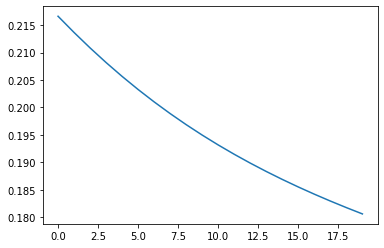

In [13]:
#plot loss
plt.plot(range(0,20), losses)
plt.show()

# Creating a Single-Layer Neural Network

For this activity, we will create a single-layer neural network, which will be a starting
point from which we will create deep neural networks in future activities. Let's look at
the following scenario.

You work as an assistant of the mayor of Somerville and the HR department has
asked you to build a model capable of predicting whether a person is happy with
the current administration based on their satisfaction with the city's services. To do
so, you have decided to build a single-layer neural network using PyTorch, using the
response of previous surveys. Perform the following steps to complete this activity:

In [20]:
#imports
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [21]:
#import data and review top rows
data_set = pd.read_csv(r'https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-with-PyTorch-Workshop/master/Chapter01/Activity1.01/SomervilleHappinessSurvey2015.csv')

data_set.head()


,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [22]:
#create torch tensors from data
y = torch.tensor(data_set['D'].values.astype(np.float32))
x = torch.tensor(data_set.drop('D', axis = 1).values.astype(np.float32))


In [23]:
#define single layer model
input_units = 6
output_units = 1

model = nn.Sequential(nn.Linear(input_units, output_units), nn.Sigmoid())

print(model)


Sequential(
  (0): Linear(in_features=6, out_features=1, bias=True)
  (1): Sigmoid()
)


In [24]:
#define loss
loss_funct = nn.MSELoss()

print(loss_funct)


MSELoss()


In [25]:
#define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [26]:
# run optimization for n20 iterations saving losses in a list
n = 100
losses = []
for i in range(n):
    y_pred = model(x)
    loss = loss_funct(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i%5 == 0:
        print(i, loss.item())
        

0 0.29979875683784485
5 0.25794634222984314
10 0.2644039988517761
15 0.25615406036376953
20 0.2583836019039154
25 0.25539007782936096
30 0.2555456757545471
35 0.2543550133705139
40 0.2539905309677124
45 0.25326865911483765
50 0.25287824869155884
55 0.2523251473903656
60 0.2519611418247223
65 0.2515295445919037
70 0.25119391083717346
75 0.2508619427680969
80 0.2505670487880707
85 0.25030577182769775
90 0.2500651478767395
95 0.24985437095165253


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([143])) that is different to the input size (torch.Size([143, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


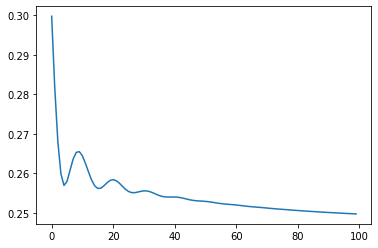

In [28]:
#plot loss
plt.plot(range(0,n), losses)
plt.show()


# Summary
Deep learning is a subset of machine learning that was inspired by the biological
structure of human brains. It uses deep neural networks to solve complex data
problems through the use of vast amounts of data. Even though the theory was
developed decades ago, it has been used recently thanks to advances in hardware
and software that allow us to collect and process millions of pieces of data.
With the popularity of deep learning solutions, many deep learning libraries have
been developed. Among them, one of the most recent ones is PyTorch. PyTorch uses
a C++ backend, which helps speed up computation, while having a Python frontend to
keep the library easy to use.

It uses tensors to store data, which are n-ranked matrix-like structures that can be
run on GPUs to speed up processing. It offers three main elements that are highly
useful for creating complex neural network architectures with little effort.

The autograd library can compute the derivatives of a function, which are used
as the gradients to optimize the weights and biases of a model. Moreover, the
nn module helps you to easily define the model's architecture as a sequence of
predefined modules, as well as to determine the loss function to be used to measure
the model. Finally, the optim package is used to select the optimization algorithm to
be used to update the parameters, considering the gradients calculated previously.

In the next chapter, we will learn about the building blocks of a neural network. We
will cover the three types of learning processes, as well as the three most common
types of neural networks. For each neural network, we will learn how the network
architecture is structured, as well as how the training process works. Finally, we will
learn about the importance of data preparation and solve a regression data problem.